<a href="https://colab.research.google.com/github/chettuprasanna/Sonar-Rock-vs-Mine-Prediction-Python-Machine-Learning-Project/blob/main/Rcock_Mine_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data collection ad data processing

In [27]:
import pandas as pd

# Load the dataset (upload sonar.csv to Colab first)
df = pd.read_csv('/content/sonar.csv', header=None)

print(df.shape)
df.head()



(208, 61)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [28]:
# X = first 60 columns, y = last column
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [5]:
#numer of rows and columns
sonar_data.shape

(208, 61)

In [6]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
sonar_data[60].value_counts()

,count
60,
M,111
R,97


M-->Mine
R-->Rock

In [8]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [29]:
#separating data and lables
x=sonar_data.drop(columns=60,axis=1)
y=sonar_data[60]

In [30]:
print(x)
print(y)

         0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

Training and test data

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

print("Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label mapping: {'M': np.int64(0), 'R': np.int64(1)}


In [12]:
print(x.shape, x_train.shape, x_test.shape)


(208, 60) (187, 60) (21, 60)


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [34]:
print(x_train)
print(y_train)

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
140  0.0412  0.1135  0.0518  0.0232  0.0646  0.1124  0.1787  0.2407  0.2682   
5    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
154  0.0117  0.0069  0.0279  0.0583  0.0915  0.1267  0.1577  0.1927  0.2361   
131  0.1150  0.1163  0.0866  0.0358  0.0232  0.1267  0.2417  0.2661  0.4346   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   

         9   ...      50      51      52      53   

Model Training -->LogisticRegression

In [14]:
model = LogisticRegression

In [15]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Accuracy on training data
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, x_train_prediction)




In [17]:
print("Accuracy on training data:", training_data_accuracy)

Accuracy on training data: 0.8342245989304813


In [18]:
# Accuracy on test data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test, x_test_prediction)




In [19]:
print("Accuracy on test data:", test_data_accuracy)

Accuracy on test data: 0.7619047619047619


Making a predictive system

In [20]:
input_data = (
    0.0453, 0.0523, 0.0843, 0.0689, 0.1183, 0.2583, 0.2156, 0.3481, 0.3337, 0.2872,
    0.4918, 0.6552, 0.6919, 0.7797, 0.7464, 0.9444, 1.0000, 0.8874, 0.8024, 0.7818,
    0.5212, 0.4052, 0.3957, 0.3914, 0.3250, 0.3200, 0.3271, 0.2767, 0.4423, 0.2028,
    0.3788, 0.2947, 0.1984, 0.2341, 0.1306, 0.4182, 0.3835, 0.1057, 0.1840, 0.1970,
    0.1674, 0.0583, 0.1401, 0.1628, 0.0621, 0.0203, 0.0530, 0.0742, 0.0409, 0.0061,
    0.0125, 0.0084, 0.0089, 0.0048, 0.0094, 0.0191, 0.0140, 0.0049, 0.0052, 0.0044
)

# Changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make prediction
prediction = model.predict(input_data_reshaped)
print("Prediction:", prediction)

if prediction[0] == 'R':
    print("The object is a Rock")
else:
    print("The object is a Mine")


Prediction: ['R']
The object is a Rock


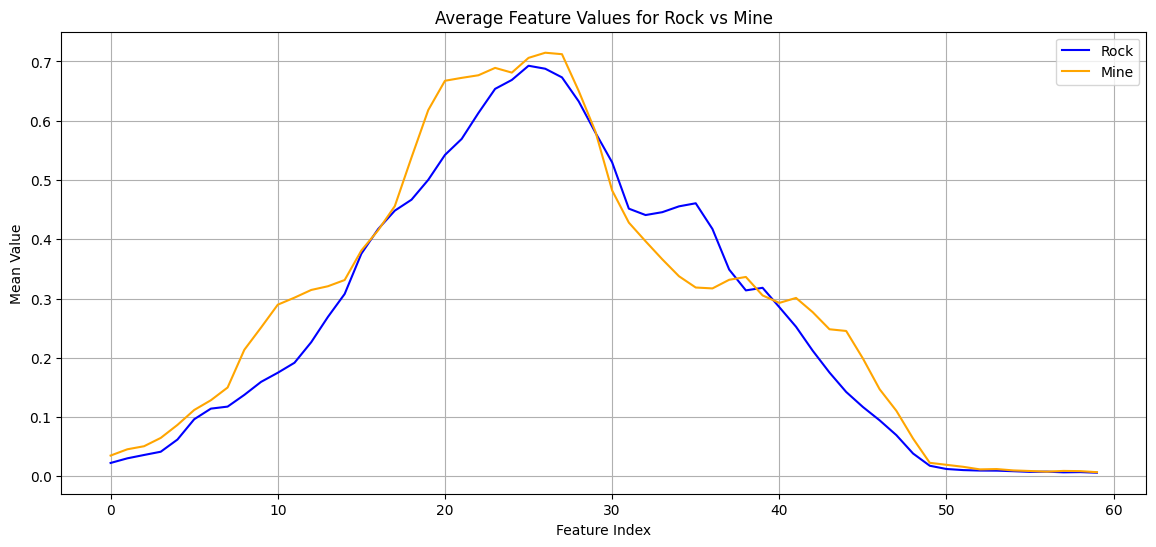

In [21]:
# Separate Rock and Mine data
rock_data = sonar_data[sonar_data[60] == 'R'].drop(60, axis=1)
mine_data = sonar_data[sonar_data[60] == 'M'].drop(60, axis=1)

# Calculate means
rock_means = rock_data.mean()
mine_means = mine_data.mean()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(rock_means.values, label='Rock', color='blue')
plt.plot(mine_means.values, label='Mine', color='orange')
plt.title("Average Feature Values for Rock vs Mine")
plt.xlabel("Feature Index")
plt.ylabel("Mean Value")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-3108248082.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='Feature_0', data=df_copy, palette="Set2")


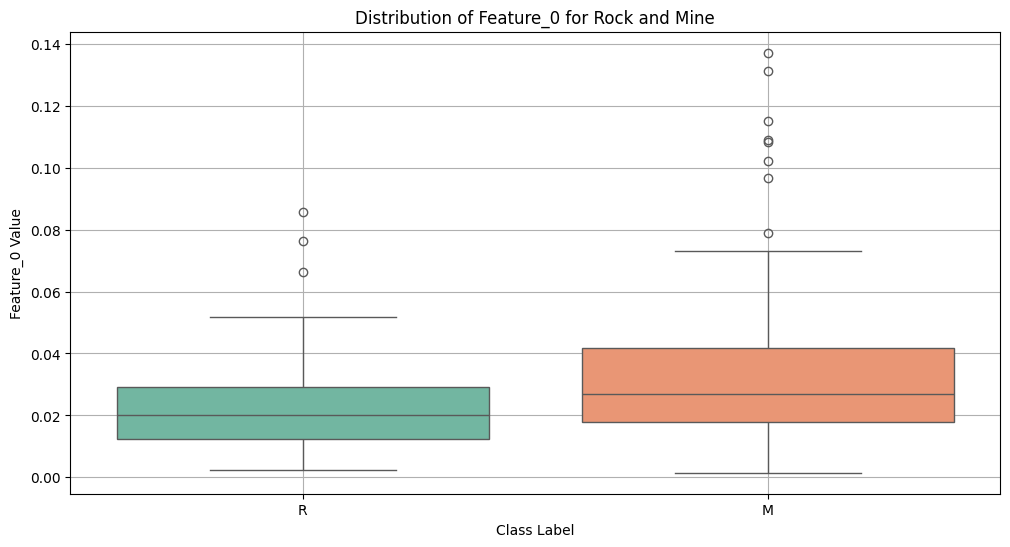

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sonar_data is already loaded
df_copy = sonar_data.copy()

# Assign column names
df_copy.columns = [f"Feature_{i}" for i in range(60)] + ['Label']

# Plot boxplot for Feature_0
plt.figure(figsize=(12, 6))
sns.boxplot(x='Label', y='Feature_0', data=df_copy, palette="Set2")
plt.title("Distribution of Feature_0 for Rock and Mine")
plt.xlabel("Class Label")
plt.ylabel("Feature_0 Value")
plt.grid(True)
plt.show()


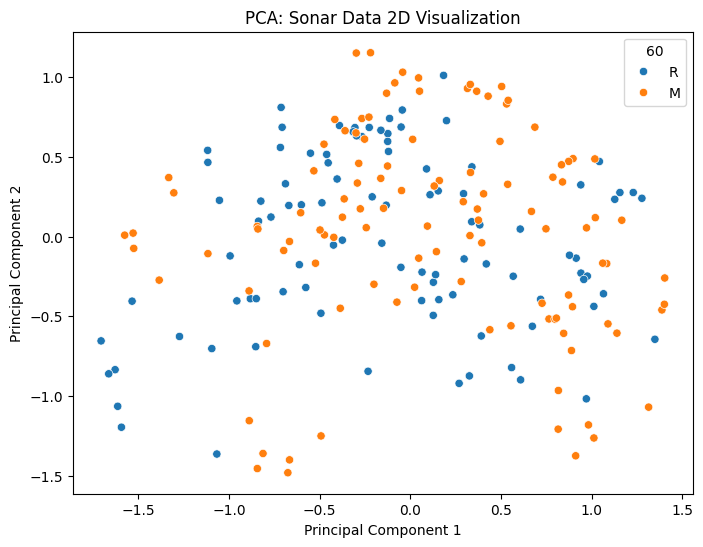

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming sonar_data is loaded and x, y are already split
x = sonar_data.drop(60, axis=1)
y = sonar_data[60]

# Apply PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=x_reduced[:,0], y=x_reduced[:,1], hue=y)
plt.title("PCA: Sonar Data 2D Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


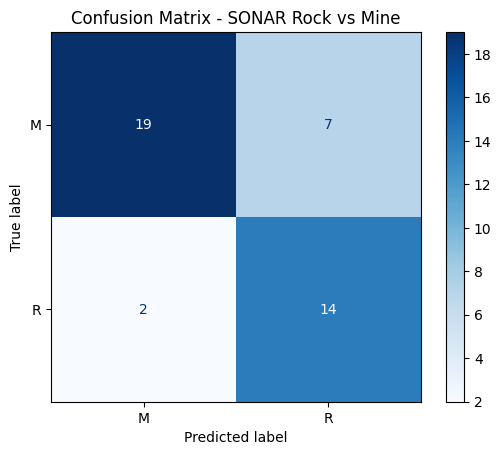


Classification Report:

              precision    recall  f1-score   support

           M       0.90      0.73      0.81        26
           R       0.67      0.88      0.76        16

    accuracy                           0.79        42
   macro avg       0.79      0.80      0.78        42
weighted avg       0.81      0.79      0.79        42



In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
url = "/content/sonar.csv"
data = pd.read_csv(url, header=None)

# Separate features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode labels (M = Mine, R = Rock)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # M=1, R=0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SONAR Rock vs Mine")
plt.show()

# Classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


KNN model


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_model.fit(X_train, y_train)

knn_acc = knn_model.score(X_test, y_test)
print("KNN Accuracy:", knn_acc)


KNN Accuracy: 0.7380952380952381


Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 0.7857142857142857


Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))


Random Forest Accuracy: 0.8571428571428571


In [39]:
import pandas as pd

results = {
    'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.85, 0.88, 0.80, 0.75, 0.90]  # put your outputs here
}

df_results = pd.DataFrame(results)
df_results


,Model,Accuracy
0,Logistic Regression,0.85
1,SVM,0.88
2,KNN,0.80
3,Decision Tree,0.75
4,Random Forest,0.90


AdaBoost Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

ada_acc = ada_model.score(X_test, y_test)
print("AdaBoost Accuracy:", ada_acc)


AdaBoost Accuracy: 0.8333333333333334


Navi base

In [44]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

nb_acc = nb_model.score(X_test, y_test)
print("Naive Bayes Accuracy:", nb_acc)


Naive Bayes Accuracy: 0.7380952380952381


XGBoost Classifier

In [45]:
!pip install xgboost


In [46]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    objective='binary:logistic',
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

xgb_acc = xgb_model.score(X_test, y_test)
print("XGBoost Accuracy:", xgb_acc)


XGBoost Accuracy: 0.7857142857142857


 Bagging Classifier

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bag_model.fit(X_train, y_train)

bag_acc = bag_model.score(X_test, y_test)
print("Bagging Classifier Accuracy:", bag_acc)


Bagging Classifier Accuracy: 0.8095238095238095


Voting Classifier (Ensemble of 3 models)

In [49]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

voting_model = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('svm', SVC(probability=True)),
        ('rf', RandomForestClassifier())
    ],
    voting='soft'
)

voting_model.fit(X_train, y_train)

voting_acc = voting_model.score(X_test, y_test)
print("Voting Classifier Accuracy:", voting_acc)


Voting Classifier Accuracy: 0.8571428571428571
